### About the Dataset 🌍📊
- This dataset offers a unique opportunity to explore individuals' participation in events, their geographic distribution, health status, and the causes of death. It is an invaluable resource for analyzing social dynamics and understanding the impact of events on individuals over time. By establishing connections between events and participation patterns, this dataset enables comprehensive studies across diverse fields, including:

- Social Sciences 🧑‍🤝‍🧑
- Security and Defense 🛡️
- War and Conflict Studies ⚔️
- History 📜
- Psychology 🧠
- Through insightful analyses, this dataset can uncover hidden trends and relationships, empowering researchers and analysts to derive profound insights into human behavior, societal patterns, and the outcomes of historical events.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv('fatalities_isr_pse_conflict_2000_to_2023.csv')
df.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


In [3]:
df1 = df.copy()     # We took a copy of our original data because we will be working on it.

In [4]:
df.info() 

# The `df.info()` method provides a quick overview of a pandas DataFrame’s structure, displaying data types, null values, 
# and memory usage for each column, which is crucial for understanding the dataset before analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

In [5]:
df.describe().style.background_gradient(cmap='BuPu')

# This method provides a transposed summary of the descriptive statistics for a pandas DataFrame, including count, mean, standard deviation, 
# min, 25th percentile, median, 75th percentile, and max for numerical columns.

,age
count,10995.000000
mean,26.745703
std,13.780548
min,1.000000
25%,19.000000
50%,23.000000
75%,31.000000
max,112.000000


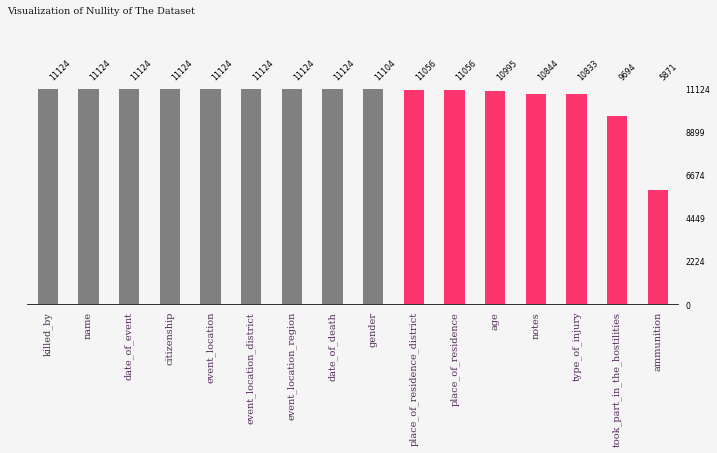

In [6]:
color = ['grey','grey','grey','grey','grey','grey','grey','grey','grey','#fe346e', '#fe346e', '#fe346e','#fe346e','#fe346e','#fe346e','#fe346e','#fe346e']
fig, ax = plt.subplots(figsize = (12,4), dpi = 70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')


msno.bar(df, sort = 'descending', 
         color = color, 
         ax = ax, fontsize =8,
         labels = 'off',filter = 'top')

ax.text(-1,1.35,'Visualization of Nullity of The Dataset',{'font': 'Serif',  'color':'black'},alpha = 0.9)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, 
                   ha = 'center', **{'font': 'Serif','weight':'normal','color':'#512b58'}, alpha = 1)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)

fig.show()

In [7]:
df.drop("notes", inplace=True, axis=1)

In [8]:
df.drop("name", inplace=True, axis=1)

In [9]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [10]:
df['gender'].fillna(df['gender'].mode()[0], inplace=True)

In [11]:
df.dropna(subset=['took_part_in_the_hostilities'], inplace=True)

In [12]:
df['place_of_residence'].fillna('Unknown', inplace=True)
df['place_of_residence_district'].fillna('Unknown', inplace=True)

In [13]:
df['type_of_injury'].fillna('Not Sure', inplace=True)
df['ammunition'].fillna('Not Sure', inplace=True)

In [14]:
df.isnull().sum()

date_of_event                   0
age                             0
citizenship                     0
event_location                  0
event_location_district         0
event_location_region           0
date_of_death                   0
gender                          0
took_part_in_the_hostilities    0
place_of_residence              0
place_of_residence_district     0
type_of_injury                  0
ammunition                      0
killed_by                       0
dtype: int64

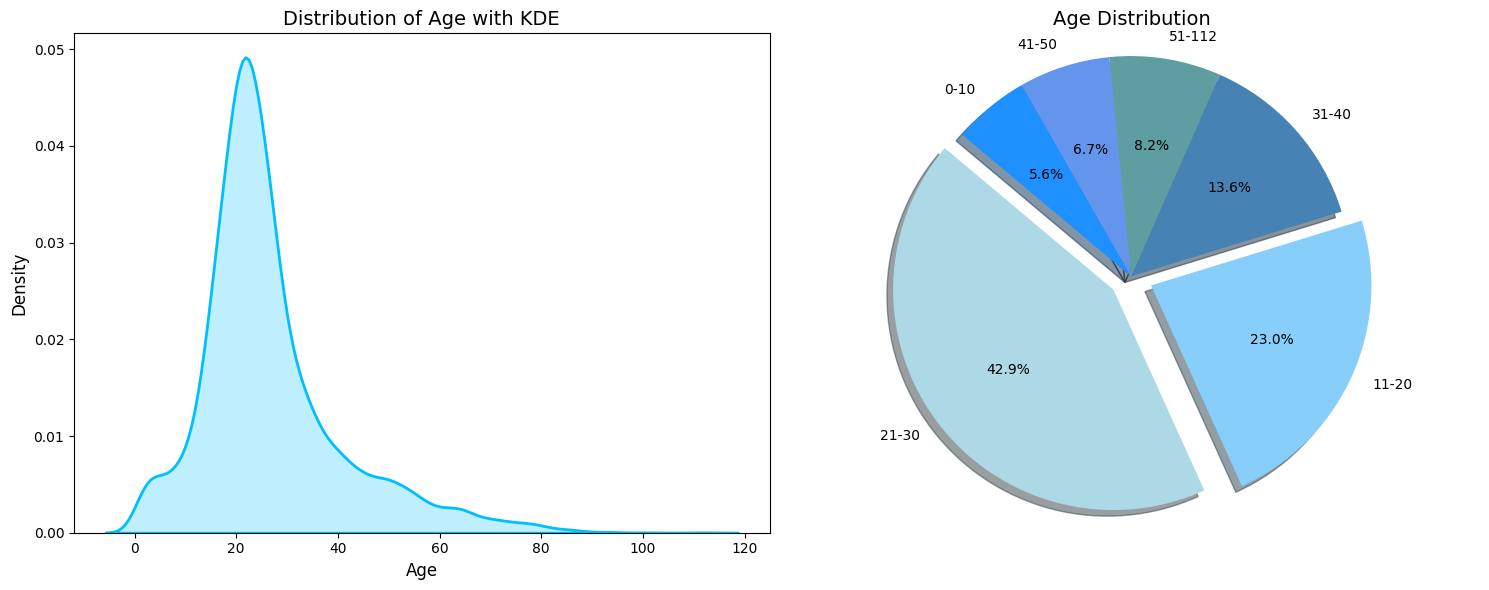

In [15]:

bins = [0, 10, 20, 30, 40, 50, 112]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-112']
age_binned = pd.cut(df['age'], bins=bins, labels=labels, right=False)


bin_counts = age_binned.value_counts()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))


sns.kdeplot(df['age'], shade=True, color='deepskyblue', linewidth=2, ax=axes[0])
axes[0].set_title('Distribution of Age with KDE', fontsize=14)
axes[0].set_xlabel('Age', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)

explode = (0.1, 0.1, 0, 0, 0, 0)
axes[1].pie(bin_counts, labels=bin_counts.index, autopct='%1.1f%%', startangle=140,
            colors=['#add8e6', '#87cefa', '#4682b4', '#5f9ea0', '#6495ed', '#1e90ff'], shadow=True, explode=explode)
axes[1].set_title("Age Distribution", fontsize=14)
axes[1].axis('equal') 

plt.tight_layout()
plt.show()


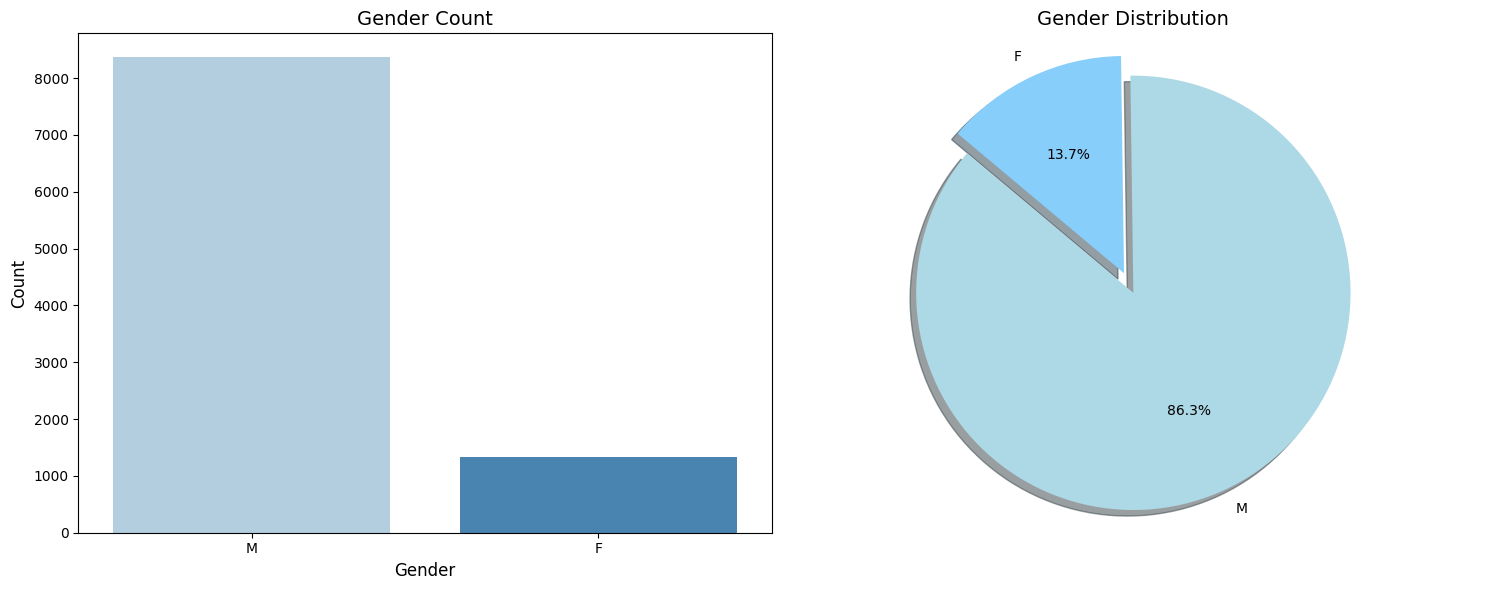

In [16]:
gender_counts = df['gender'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))


sns.countplot(data=df, x='gender', palette='Blues', ax=axes[0])
axes[0].set_title('Gender Count', fontsize=14)
axes[0].set_xlabel('Gender', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

explode = (0.1, 0)
axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140,
            colors=['#add8e6', '#87cefa'], shadow=True,explode=explode)
axes[1].set_title('Gender Distribution', fontsize=14)
axes[1].axis('equal') 

plt.tight_layout()
plt.show()

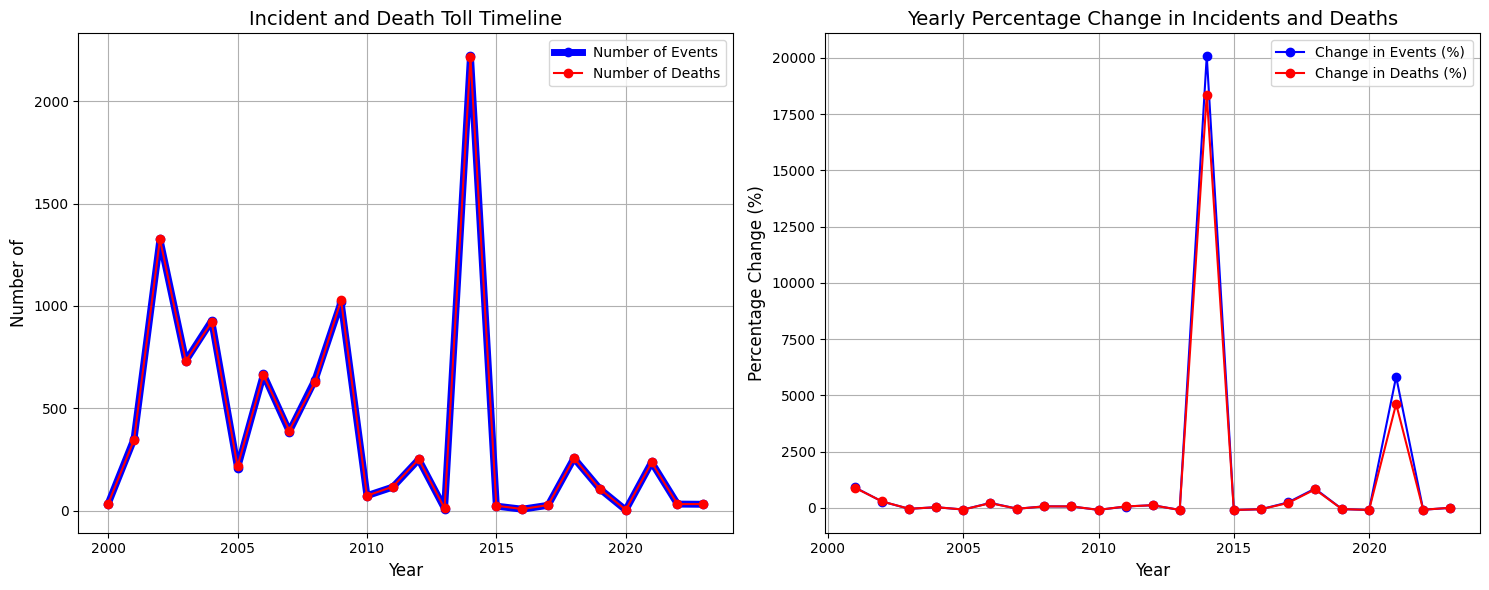

In [17]:
df['date_of_event'] = pd.to_datetime(df['date_of_event'])
df['date_of_death'] = pd.to_datetime(df['date_of_death'])

df['year_of_event'] = df['date_of_event'].dt.year
df['month_of_event'] = df['date_of_event'].dt.to_period('M')  
df['year_of_death'] = df['date_of_death'].dt.year
df['month_of_death'] = df['date_of_death'].dt.to_period('M')  


events_by_year = df.groupby('year_of_event').size()
deaths_by_year = df.groupby('year_of_death').size()


fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(events_by_year.index, events_by_year.values, linewidth=5, linestyle='-', label='Number of Events', marker='o', color='b')
axes[0].plot(deaths_by_year.index, deaths_by_year.values, label='Number of Deaths', marker='o', color='r')
axes[0].set_title('Incident and Death Toll Timeline', fontsize=14)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Number of', fontsize=12)
axes[0].legend()
axes[0].grid(True)

axes[1].plot(events_by_year.index, events_by_year.pct_change() * 100, label='Change in Events (%)', marker='o', color='b')
axes[1].plot(deaths_by_year.index, deaths_by_year.pct_change() * 100, label='Change in Deaths (%)', marker='o', color='r')
axes[1].set_title('Yearly Percentage Change in Incidents and Deaths', fontsize=14)
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Percentage Change (%)', fontsize=12)
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

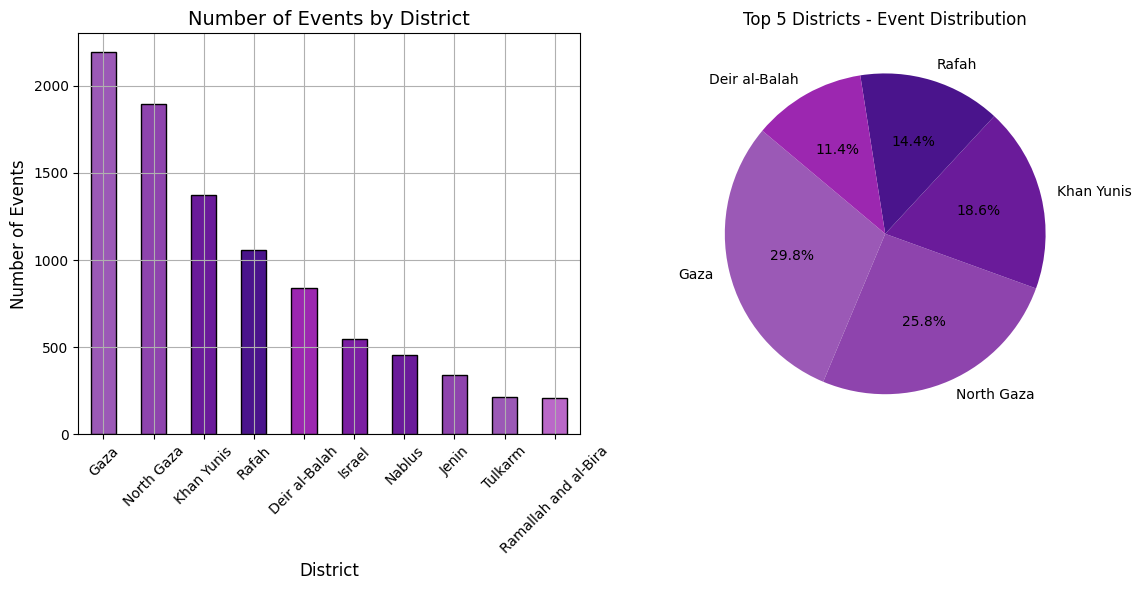

In [18]:
district_counts = df['event_location_district'].value_counts().head(10)

# Grafiği oluşturma (Bar Chart)
plt.figure(figsize=(12, 6))

# Bar grafiği (Mor tonlarıyla renkler)
plt.subplot(1, 2, 1)  # 1 satır, 2 sütun, ilk sütun
district_counts.plot(kind='bar', color=['#9b59b6', '#8e44ad', '#6a1b9a', '#4a148c', '#9c27b0', '#7b1fa2', '#6a1b9a', '#8e44ad', '#9b59b6', '#ba68c8'], edgecolor='black')
plt.title('Number of Events by District', fontsize=14)
plt.xlabel('District', fontsize=12)
plt.ylabel('Number of Events', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# İlk 5 ilçeyi pie chart ile gösterme
top_5_districts = district_counts.head(5)

plt.subplot(1, 2, 2)  # 1 satır, 2 sütun, ikinci sütun
plt.pie(top_5_districts, labels=top_5_districts.index, autopct='%1.1f%%', startangle=140, colors=['#9b59b6', '#8e44ad', '#6a1b9a', '#4a148c', '#9c27b0'])
plt.title('Top 5 Districts - Event Distribution')

# Gösterme
plt.tight_layout()  # Düzgün düzenleme
plt.show()

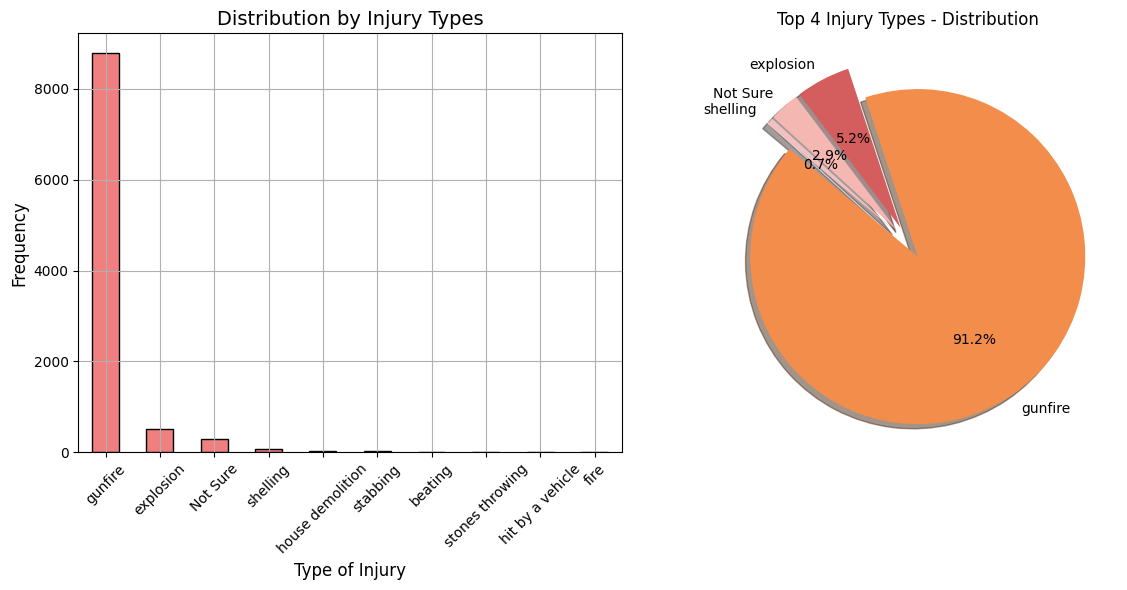

In [19]:
injury_counts = df['type_of_injury'].value_counts()

# Grafiği oluşturma (Bar Chart)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  
injury_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Distribution by Injury Types', fontsize=14)
plt.xlabel('Type of Injury', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

top_4_injuries = injury_counts.head(4)

plt.subplot(1, 2, 2)  

explode = (0.1, 0.1, 0.1, 0.1)  
plt.pie(top_4_injuries, 
        labels=top_4_injuries.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['#f28d4b', '#d45d5d', '#f5b7b1', '#f1c0c0'], 
        explode=explode, 
        shadow=True)

plt.title('Top 4 Injury Types - Distribution')

plt.tight_layout() 
plt.show()

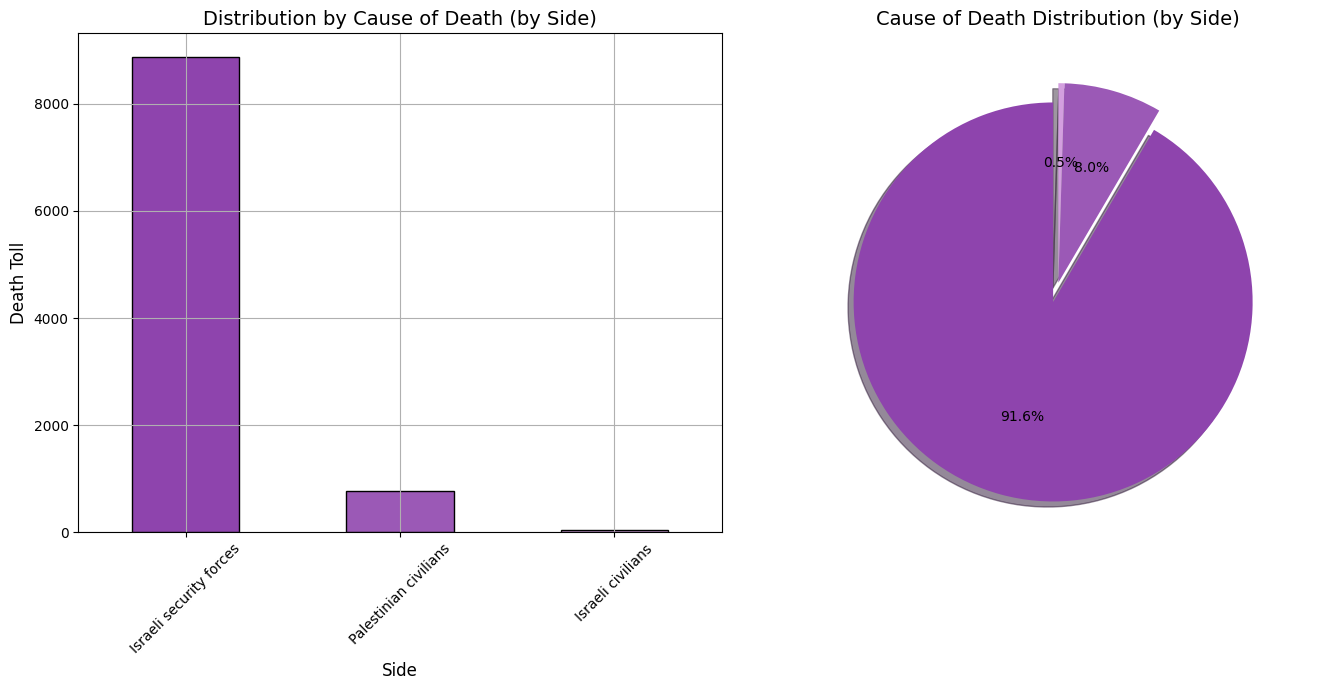

In [20]:
death_counts = df['killed_by'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

death_counts.plot(kind='bar', color=['#8e44ad', '#9b59b6', '#d39fdf'], edgecolor='black', ax=axes[0])
axes[0].set_title('Distribution by Cause of Death (by Side)', fontsize=14)
axes[0].set_xlabel('Side', fontsize=12)
axes[0].set_ylabel('Death Toll', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

axes[1].pie(death_counts, autopct='%1.1f%%', startangle=90, colors=['#8e44ad', '#9b59b6', '#d39fdf'], 
            explode=(0.1, 0, 0), shadow=True)  
axes[1].set_title('Cause of Death Distribution (by Side)', fontsize=14)
axes[1].set_ylabel('')  

plt.tight_layout()
plt.show()

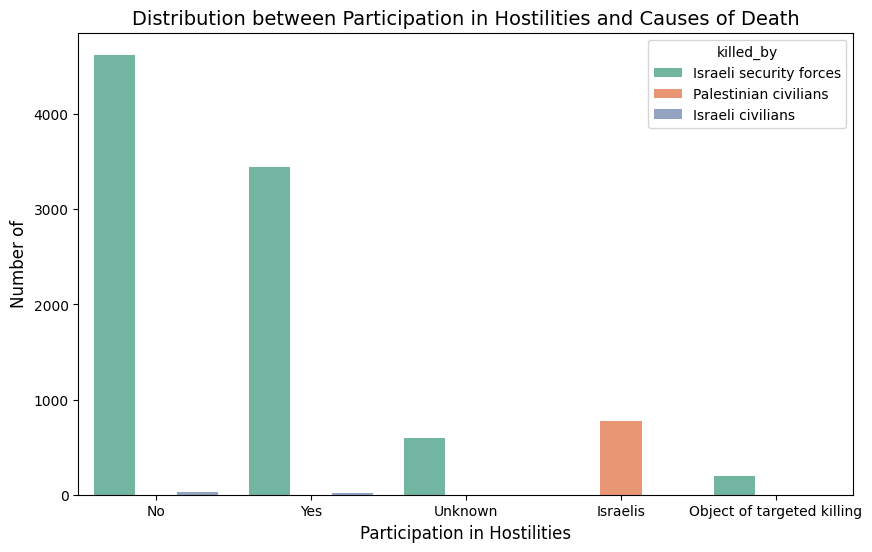

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='took_part_in_the_hostilities', hue='killed_by', data=df, palette='Set2')

plt.title('Distribution between Participation in Hostilities and Causes of Death', fontsize=14)
plt.xlabel('Participation in Hostilities', fontsize=12)
plt.ylabel('Number of', fontsize=12)

plt.show()

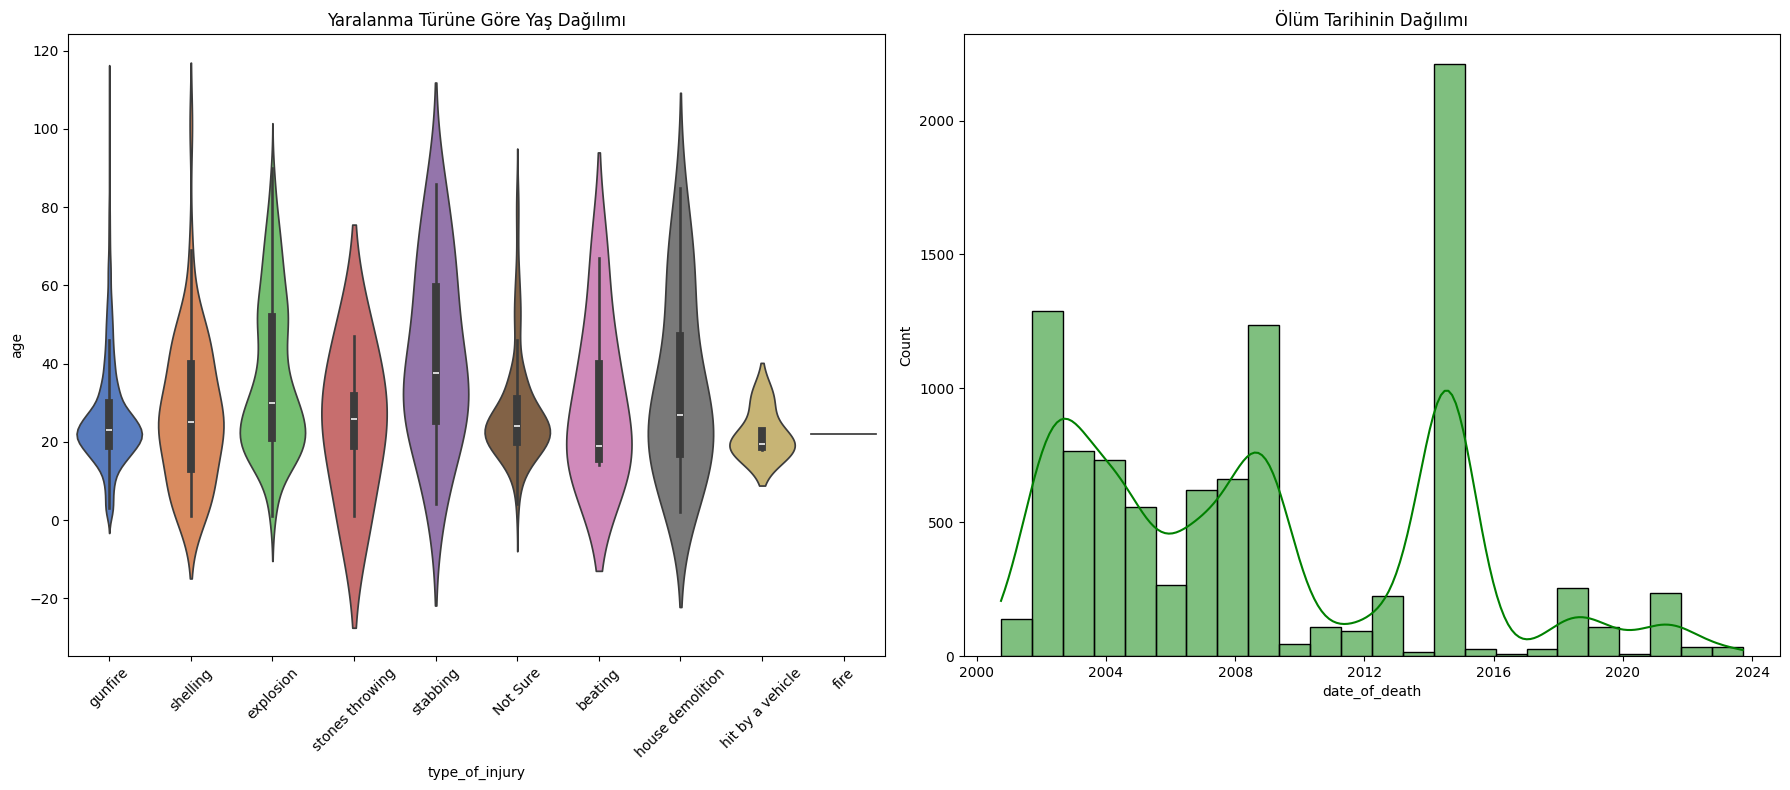

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot(x=df['type_of_injury'], y=df['age'], ax=axes[0], palette='muted')
axes[0].set_title('Yaralanma Türüne Göre Yaş Dağılımı')
axes[0].tick_params(axis='x', rotation=45)

sns.histplot(df['date_of_death'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Ölüm Tarihinin Dağılımı')

plt.tight_layout()
plt.show()

### Graphs and Analysis 📊✨
#### Age Box Plot 📦👥
- This plot illustrates the age distribution of individuals involved in the incidents.

- Ages are widely spread, but the majority fall between 20 and 40 years old, highlighting the vulnerability of this age group.
- Age Distribution by Injury Type 🧍‍♂️💥
- This graph reveals how injury types vary across different ages.

- A striking observation is that head and chest injuries are significantly more common among younger individuals, emphasizing the disproportionate impact of violence on youth.
- Distribution of Date of Death 🕰️⚰️
- This plot captures the temporal distribution of deaths over time.

- Peaks in this graph align with major social and political events, providing vital clues about how war and oppression influence human mortality patterns.

#### Analysis and Reflection
- These visualizations shed light on the profound human cost of war and oppression. The data tells a story of suffering that extends beyond individual lives, affecting entire societies.
- Peace and justice are enduring aspirations of humanity. We envision a world where conflict gives way to harmony and violence is replaced by compassion.
- May peace reign across all nations one day. 🕊️🌍

